In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

In [3]:
folder_path = "/Users/alielguindi/Desktop/Projects/ada_milestone2/MovieSummaries"
file_path = os.path.join(folder_path,'character.metadata.tsv')

In [4]:
characters = pd.read_csv(file_path, sep = '\t', names=["wikipedia_movie_id", "freebase_movie_id", "movie_dor", "character_name", "actor_dob",
                                "actor_gender", "actor_height", "actor_ethnicity", "actor_name",
                                "actor_age_release", "freebase_character_map", "freebase_character_id", "freebase_actor_id"],
                         header=None)
characters = characters[characters['actor_name'].notna()]

In [5]:
characters.head()

,wikipedia_movie_id,freebase_movie_id,movie_dor,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_release,freebase_character_map,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Actor names with different actor ids

In [6]:
# Check if an actor name corresponds to more than one actor id
actor_not_unique_id = characters.groupby(['actor_name']).apply(lambda x: len(x['freebase_actor_id'].unique()) > 1)

In [7]:
# Check if an actor name corresponds to more than one date of birth
actor_not_unique_dob = characters.groupby(['actor_name']).apply(lambda x: len(x['actor_dob'].unique()) > 1)

In [8]:
# Not unique id but unique dob
mask = actor_not_unique_id & ~actor_not_unique_dob
len(actor_not_unique_id[mask])

372

In [9]:
# Unique id but not unique dob
mask = ~actor_not_unique_id & actor_not_unique_dob
len(actor_not_unique_id[mask])

0

In [10]:
# Not unique id and not unique dob
mask = actor_not_unique_id & actor_not_unique_dob
len(actor_not_unique_id[mask])

868

It seems like 372 *unique* actor names are referenced with different freebase actor ids (despite describing the same human being as the date of birth is unique).

For the 868 other actor names, as the dates of birth differ they are most likely homonyms.

### Number of characters per movie

In [11]:
nb_characters_per_movie = characters.groupby(['freebase_movie_id']).size()

Text(0, 0.5, 'Number of movies (in log scale)')

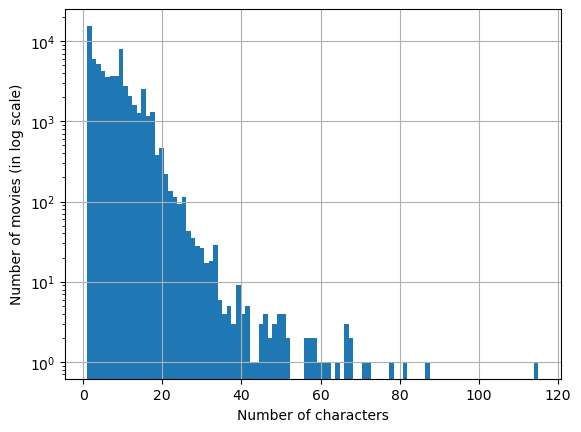

In [12]:
nb_characters_per_movie.hist(bins=100, log=True)
plt.xlabel("Number of characters")
plt.ylabel("Number of movies (in log scale)")

In [13]:
nb_characters_per_movie.describe()

count    64258.000000
mean         6.994320
std          5.403263
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        115.000000
dtype: float64

### Characteristics over time

In [14]:
INTEREST = "actor_gender" # actor_height, actor_ethnicity, actor_age_release

In [15]:
characters['movie_year'] = characters['movie_dor'].str[:4]


In [16]:
#Removing year 1010 from dataframe

characters=characters.loc[~(characters['movie_year'] == '1010')]

#take years after 1910
characters=characters.loc[characters['movie_year'] > '1910']



In [17]:
characters['movie_year'].max()

'2016'

In [18]:
characters_female = characters.groupby(['movie_year']).apply(lambda x: len(x[x['actor_gender'] == 'F']))
characters_male = characters.groupby(['movie_year']).apply(lambda x: len(x[x['actor_gender'] == 'M']))
characters_female_perc = (characters_female / (characters_female + characters_male)) * 100.0
characters_male_perc = (characters_male / (characters_female + characters_male)) * 100.0



In [19]:
# Some descriptive statistics for women proportion wrt to men
characters_female_perc.describe()

count    106.000000
mean      32.485996
std        3.450784
min       14.285714
25%       30.710041
50%       32.024664
75%       34.342434
max       44.817073
dtype: float64

In [20]:
# Some descriptive statistics for men proportion wrt to men
characters_male_perc.describe()

count    106.000000
mean      67.514004
std        3.450784
min       55.182927
25%       65.657566
50%       67.975336
75%       69.289959
max       85.714286
dtype: float64

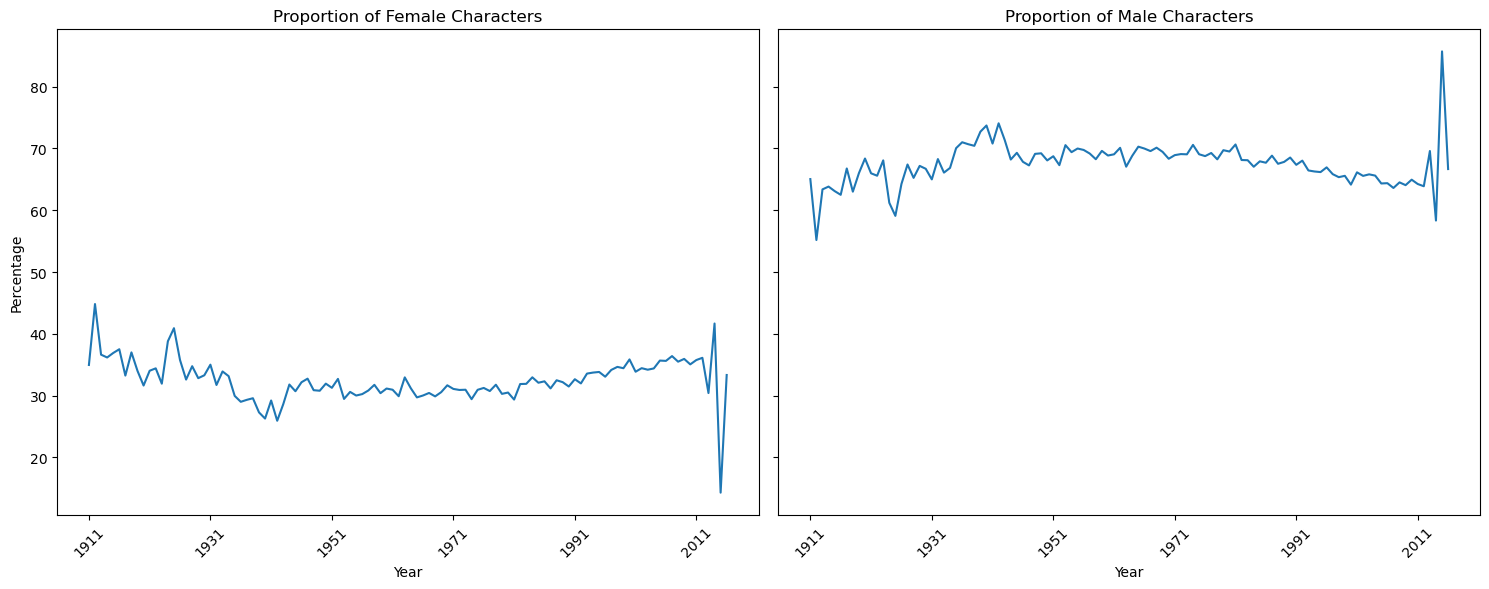

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Assuming characters_female_perc and characters_male_perc are Series with the index as years

axs[0].plot(characters_female_perc.index, characters_female_perc.values)
axs[0].set_title("Proportion of Female Characters")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Percentage")
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))  # Set maximum number of x-axis labels

axs[1].plot(characters_male_perc.index, characters_male_perc.values)
axs[1].set_title("Proportion of Male Characters")
axs[1].set_xlabel("Year")
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))  # Set maximum number of x-axis labels

# Rotate x-axis labels for readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout
plt.show()


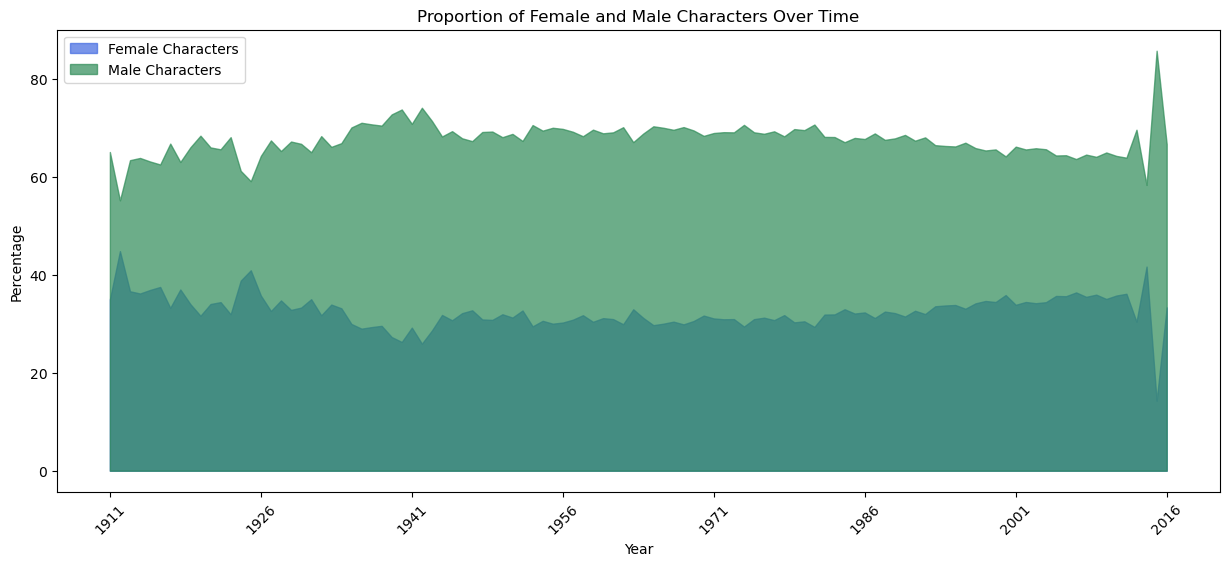

In [22]:
import matplotlib.pyplot as plt

# Assuming characters_female_perc and characters_male_perc are pandas Series indexed by 'movie_year'

# Prepare data for plotting
years = characters_female_perc.index
female_perc = characters_female_perc.values
male_perc = characters_male_perc.values

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the stacked area chart with more contrasting colors and transparency
ax.fill_between(years, female_perc, label='Female Characters', color='royalblue', alpha=0.7)
ax.fill_between(years, male_perc, label='Male Characters', color='seagreen', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Female and Male Characters Over Time')

# Add a legend to the plot
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Keep a maximum of 10 x-ticks
ax.tick_params(axis='x', rotation=45) 

# Display the plot
plt.show()


Height column

In [23]:
# Let's start by insepecting the height column in meters
characters.loc[characters['actor_gender'] == 'M']['actor_height'].describe()
# We have outliers, very high standard deviation and the maximum value is imossible in meters -> 510



count    95971.000000
mean         1.863663
std          5.531619
min          0.813000
25%          1.750000
50%          1.800000
75%          1.850000
max        510.000000
Name: actor_height, dtype: float64

For men : We have outliers, very high standard deviation and the maximum value is imossible in meters -> 510

In [24]:
# Remove outliers using z-score for men
# And then re-compute the descriptive statistics to see if the outliers were the cause of the high standard deviation
from scipy import stats
# Select only the male actors
male_actors = characters[characters['actor_gender'] == 'M']

# Drop NaN values from the 'actor_height' column if necessary
male_actors = male_actors.dropna(subset=['actor_height'])

# Calculate Z-scores for male actors' heights
male_actors['height_zscore'] = stats.zscore(male_actors['actor_height'])

# Define a threshold for your outliers
threshold = 3

# Filter out outliers based on the Z-score
male_actors_no_outliers = male_actors[(male_actors['height_zscore'].abs() <= threshold)]
male_actors_no_outliers['actor_height'].describe()





count    95957.000000
mean         1.799844
std          0.088490
min          0.813000
25%          1.750000
50%          1.800000
75%          1.850000
max          2.356000
Name: actor_height, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


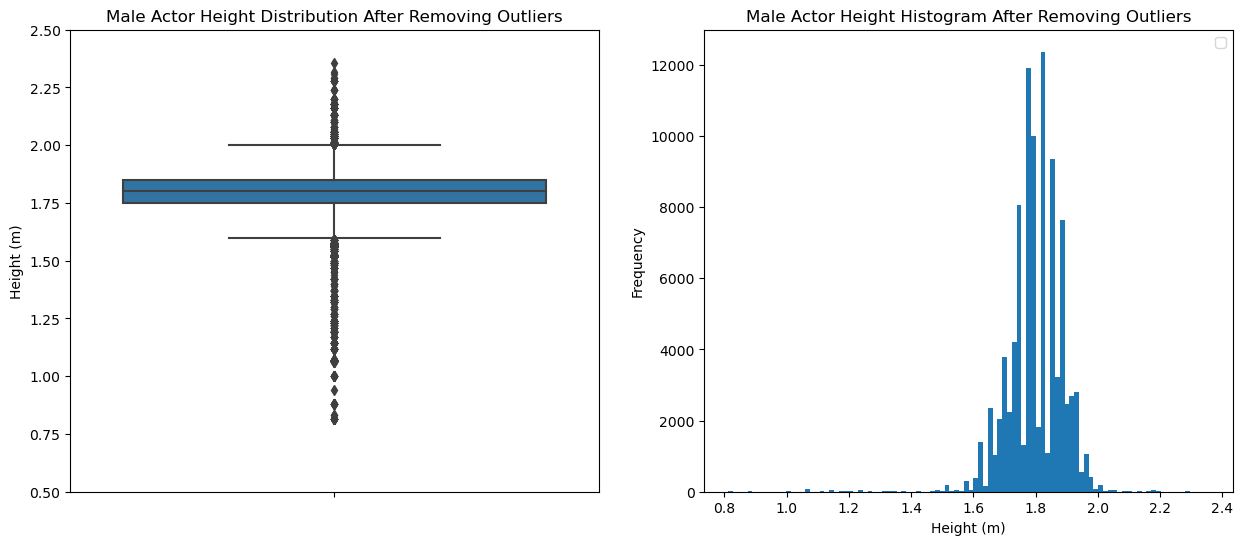

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Plot the cleaned data with Seaborn

sns.boxplot(y=male_actors_no_outliers['actor_height'], ax = axs[0])

axs[0].set_title('Male Actor Height Distribution After Removing Outliers')
axs[0].set_ylabel('Height (m)')
axs[0].set_ylim(0.5, 2.5)  # Set y-axis limits to typical human height range in meters

axs[1].hist(male_actors_no_outliers['actor_height'], bins=100)
axs[1].set_title('Male Actor Height Histogram After Removing Outliers')
axs[1].set_xlabel('Height (m)')
axs[1].set_ylabel('Frequency')
plt.legend()
plt.show()

We get a much better and reasonable std after removing the outliers and also the maximum value is okay -> 2.35 meters

Text(0, 0.5, 'Probability')

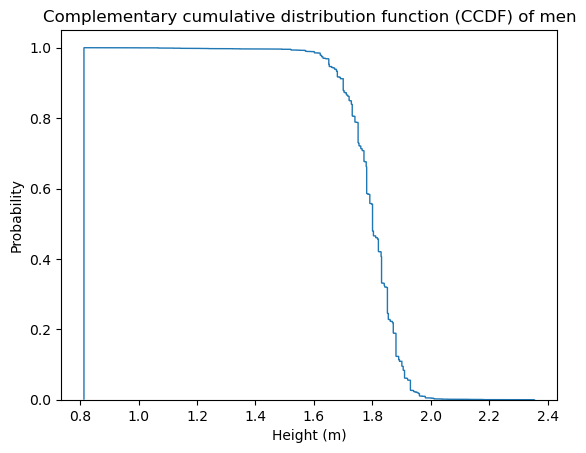

In [26]:
# Plotting the ccdf
hist_male = plt.hist(male_actors_no_outliers['actor_height'], bins=1000, density=True, cumulative=-1,
                                 histtype='step')

plt.title('Complementary cumulative distribution function (CCDF) of men')
plt.xlabel('Height (m)')
plt.ylabel('Probability')


Probably not a power law.

In [27]:
female = characters.loc[characters['actor_gender'] == 'F']
female['actor_height'].describe()


count    55030.000000
mean         1.659292
std          0.068673
min          0.610000
25%          1.610000
50%          1.660000
75%          1.700000
max          2.010000
Name: actor_height, dtype: float64

For women : Reasonable standard deviation and maximum value

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


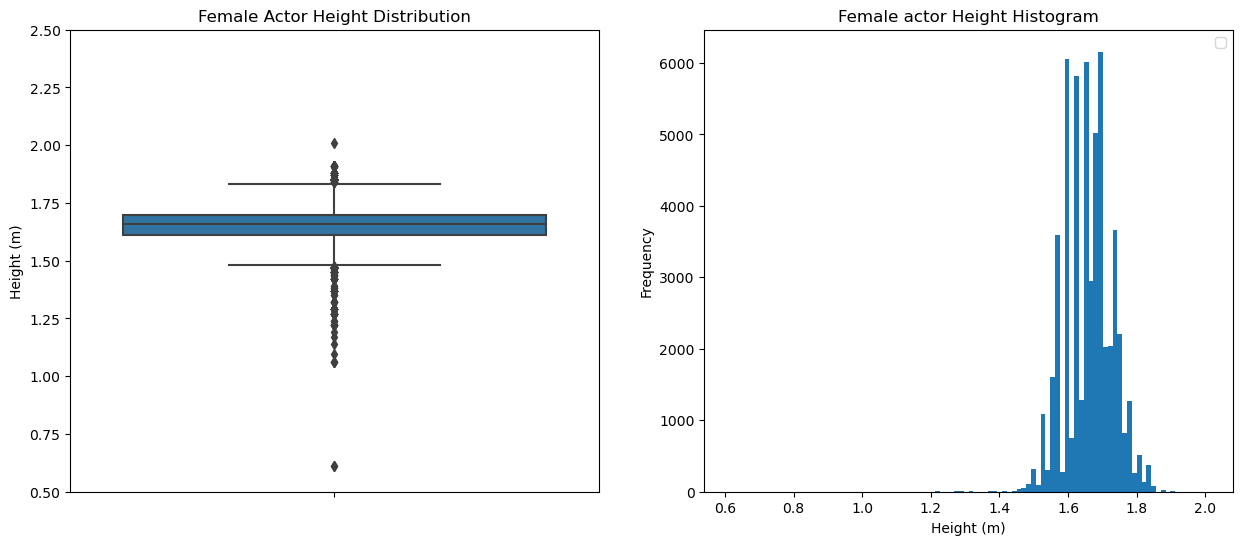

In [28]:
# Here we don't clean the data because we don't have outliers
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Plot the cleaned data with Seaborn

sns.boxplot(y=female['actor_height'], ax = axs[0])

axs[0].set_title('Female Actor Height Distribution')
axs[0].set_ylabel('Height (m)')
axs[0].set_ylim(0.5, 2.5)  # Set y-axis limits to typical human height range in meters

axs[1].hist(female['actor_height'], bins=100)
axs[1].set_title('Female actor Height Histogram')
axs[1].set_xlabel('Height (m)')
axs[1].set_ylabel('Frequency')
plt.legend()
plt.show()

Text(0, 0.5, 'Probability')

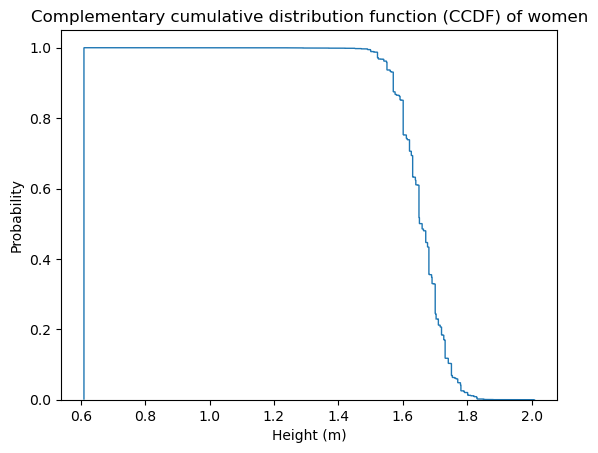

In [29]:
# Plotting the ccdf
hist_male = plt.hist(female['actor_height'], bins=1000, density=True, cumulative=-1,
                                 histtype='step')

plt.title('Complementary cumulative distribution function (CCDF) of women')
plt.xlabel('Height (m)')
plt.ylabel('Probability')

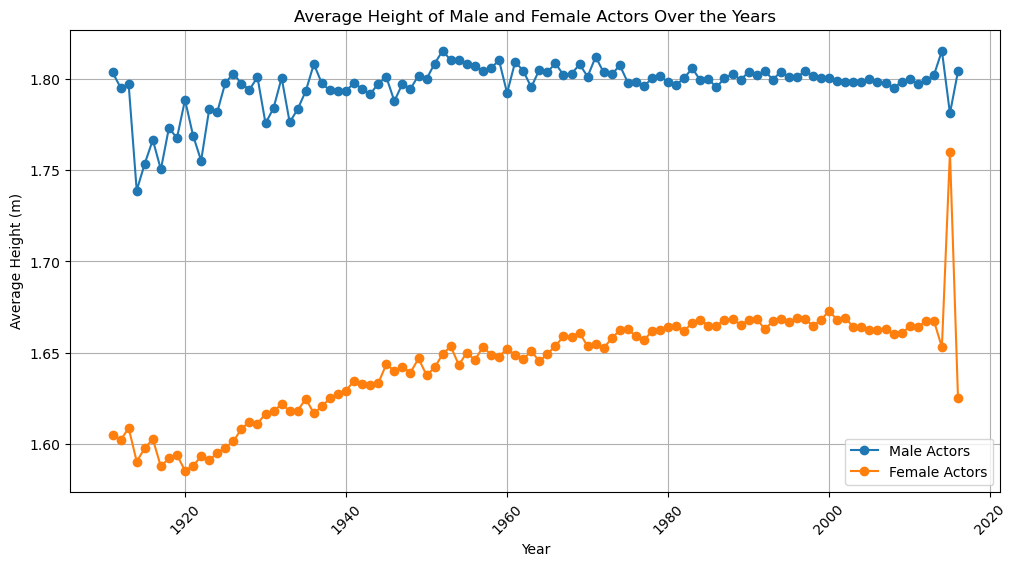

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by year for male actors
male_yearly_group = male_actors_no_outliers.groupby('movie_year')['actor_height'].mean()

# Convert the index to integers
male_yearly_group.index = male_yearly_group.index.astype(int)

# Similarly, you can create a group for female actors
female_yearly_group = female.groupby('movie_year')['actor_height'].mean()

# Convert the index to integers
female_yearly_group.index = female_yearly_group.index.astype(int)

# Now you can plot the data for both genders together
plt.figure(figsize=(12, 6))
plt.plot(male_yearly_group, label='Male Actors', marker='o')
plt.plot(female_yearly_group, label='Female Actors', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Height (m)')
plt.title('Average Height of Male and Female Actors Over the Years')
plt.legend()
plt.grid(True)

# Set the x-axis major locator and rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.xticks(rotation=45)

plt.show()




By observing the plot we could see that there is a very high value around the 2015 which could be a potential outlier.
We have also an upward trend throughout the years namely female's heights increase with time whichis not the case in the male world

In [31]:
#Let's see which date corresponds to this value
female_yearly_group.max()
female_yearly_group[female_yearly_group == female_yearly_group.max()]

movie_year
2015    1.76
Name: actor_height, dtype: float64

In [32]:
#Let us inspect the range of heights in year 2015
female[female['movie_year'] == '2015']['actor_height']
#We have just two values with one large that's why we see the peak in the above graph

263065    1.82
263067    1.70
Name: actor_height, dtype: float64

In [33]:
# Actor age at movie release
characters

,wikipedia_movie_id,freebase_movie_id,movie_dor,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_release,freebase_character_map,freebase_character_id,freebase_actor_id,movie_year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957


In [34]:
# Assuming you have a DataFrame 'characters' with columns 'actor_age_release', 'freebase_actor_id', and 'actor_gender'

# Remove rows with NaN values in 'actor_age_release'
characters_cleaned = characters.dropna(subset=['actor_age_release'])

# Separate male and female actors
male_actors = characters_cleaned[characters_cleaned['actor_gender'] == 'M']
female_actors = characters_cleaned[characters_cleaned['actor_gender'] == 'F']

# Group by 'freebase_actor_id' and calculate the minimum age at release for male and female actors separately
min_age_male_actors = male_actors.groupby('freebase_actor_id')['actor_age_release'].min()
min_age_female_actors = female_actors.groupby('freebase_actor_id')['actor_age_release'].min()





In [35]:
# Some values are negative, which is impossible
# Let's see how many negative values we have
negative_val_male = (min_age_male_actors.values < 0).sum()
negative_val_female = (min_age_female_actors.values < 0).sum()
negative_val_male

print('We have {} negative first appearance for male actors'.format(negative_val_male))
print('We have {} negative first appearance for female actors'.format(negative_val_female))
 





We have 178 negative first appearance for male actors
We have 94 negative first appearance for female actors


In [36]:
# We should be cleaning the data to avpid negative values
min_age_male_actors =min_age_male_actors[~(min_age_male_actors.values < 0)]
min_age_female_actors =min_age_female_actors[~(min_age_female_actors.values < 0)]





Text(0.5, 1.0, 'Distrubtion of female first appearance age')

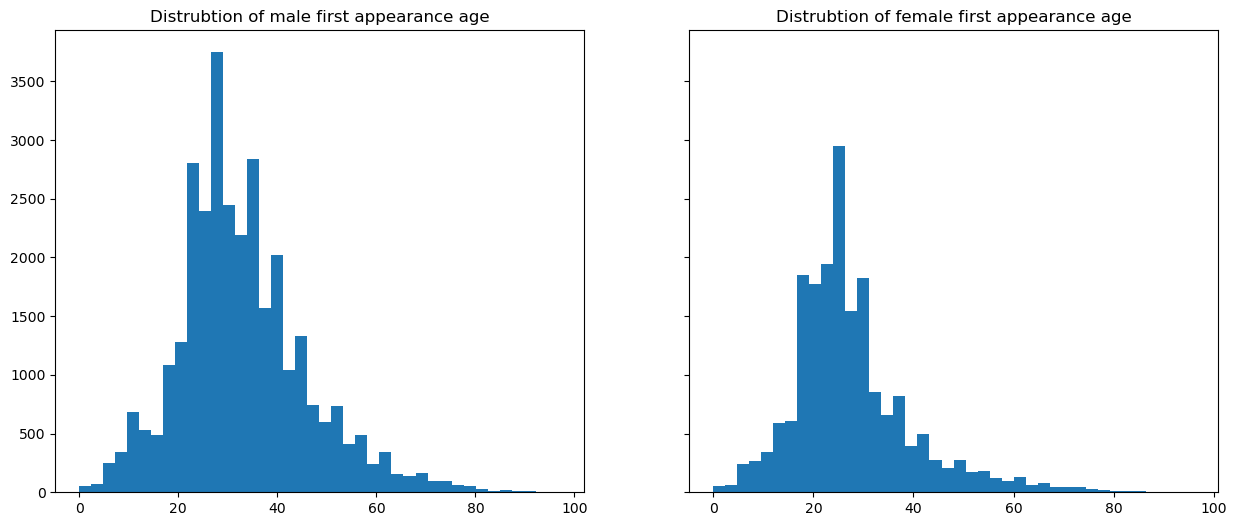

In [37]:
#Histogram for female and male actors -> min_age_male_actors, min_age_female_actors
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
# Plot the cleaned data with Seaborn
axs[0].hist(min_age_male_actors, bins= 40)
axs[0].set_title('Distrubtion of male first appearance age')

axs[1].hist(min_age_female_actors, bins= 40)
axs[1].set_title('Distrubtion of female first appearance age')




In [ ]:
#Add

